# Python for Simulations

Simulation forms part of one's toolkit when modelling risks, uncertainty, probabilities, stochastic processes etc. The following are covered in this notebook:

* Creating fake dummy data using numpy with Pandas DataFrames
* Using Python's random package to generate random data
* Financial modelling - interest-rate simulations with the Vasicek and CIR models

### Creating fake data using numpy with Pandas DataFrames

Use Cases:
* Create dummy data for high-volume load testing
* Having a common set of data to share with third-parties
* Training purposes

In [34]:
import pandas as pd
import numpy as np

#generate 1000 sales agent data. First generate their IDs
a_list = [x for x in range(10000,11000,1)]
print(len(a_list))
agent_cd = list(map(lambda x: "A" +str(x), a_list))
df_agents = pd.DataFrame(data=agent_cd, columns=['AGENT_CD'])

num_agents = df_agents.shape[0]

#randomly generate other fields
df_agents['GENDER'] = np.random.choice(['M', 'F'], num_agents)
df_agents['CURRENT_AGE'] = np.random.randint(21,65, num_agents)
df_agents['MARITAL_STATUS'] = np.random.choice(['SINGLE', 'MARRIED', 'DIVORCED', 'OTHERS'], num_agents)
df_agents['AGENCY'] = np.random.choice(['AGY_EXCEL', 'AGY_APEX', 'AGY_PEAK'], num_agents)
df_agents['AGENT_TYPE'] = np.random.choice(['INDEP', 'TIED', 'BROKER'], num_agents)
df_agents['AGENT_TENURE'] = np.random.randint(0,15, num_agents)
df_agents['AGENT_STATUS'] = np.random.choice(['ACTIVE', 'RETIRED', 'TERMINATED'], num_agents)

df_agents.head()

1000


,AGENT_CD,GENDER,CURRENT_AGE,MARITAL_STATUS,AGENCY,AGENT_TYPE,AGENT_TENURE,AGENT_STATUS
0,A10000,M,31,DIVORCED,AGY_APEX,BROKER,11,RETIRED
1,A10001,M,37,MARRIED,AGY_EXCEL,TIED,2,TERMINATED
2,A10002,M,40,SINGLE,AGY_APEX,TIED,12,RETIRED
3,A10003,F,63,SINGLE,AGY_PEAK,TIED,5,ACTIVE
4,A10004,M,40,OTHERS,AGY_PEAK,BROKER,8,TERMINATED


### Using Python's random package to generate random data

* Explore the random package documentation [here](https://docs.python.org/3/library/random.html)
* Producing random integers, categorical data
* Producing probability distributions
* Box-Muller Method for Normal Distributions

Note: Python random package is pseudo-random number generator with Mersenne Twister as the core generator

In [35]:
import random

# random integers between 2 numbers (inclusive)
print(random.randint(200,300))

# random floating point between 0.0 and 1.0
print(random.random())

# random choice
print(random.choice(['Smoker', 'Non-Smoker']))

# shuffle - in-place and affects original list!!
a = [1,2,3,4,5,6,7,8,9,10]
print("Before: ", a)
random.shuffle(a)
print("After: ", a)

247
0.6231615411922111
Non-Smoker
Before:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
After:  [7, 2, 6, 9, 4, 5, 8, 10, 1, 3]


In [37]:
# random.shuffle does not work on immutable types (eg. tuples)
b = (1,2,3,4)
random.shuffle(b) # THIS DOES NOT WORK!!

TypeError: 'tuple' object does not support item assignment

(array([0.00079698, 0.        , 0.00278943, 0.00637583, 0.00677432,
        0.0151426 , 0.03148067, 0.05459306, 0.08208884, 0.12950909,
        0.16736559, 0.25702573, 0.30763389, 0.36501638, 0.39888799,
        0.40008345, 0.39689554, 0.34429493, 0.27655171, 0.2390937 ,
        0.17932027, 0.13150153, 0.08129186, 0.05180363, 0.02590182,
        0.01593958, 0.00996224, 0.00358641, 0.00159396, 0.00159396]),
 array([-3.86923091, -3.61828326, -3.36733562, -3.11638798, -2.86544033,
        -2.61449269, -2.36354505, -2.1125974 , -1.86164976, -1.61070212,
        -1.35975447, -1.10880683, -0.85785919, -0.60691154, -0.3559639 ,
        -0.10501626,  0.14593138,  0.39687903,  0.64782667,  0.89877431,
         1.14972196,  1.4006696 ,  1.65161724,  1.90256489,  2.15351253,
         2.40446017,  2.65540782,  2.90635546,  3.1573031 ,  3.40825075,
         3.65919839]),
 <a list of 30 Patch objects>)

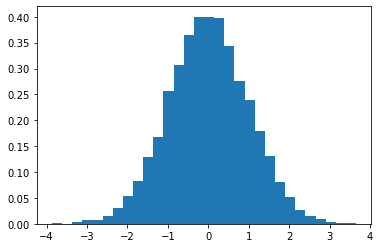

In [38]:
# generate gaussian and viz

import matplotlib.pyplot as plt
%matplotlib inline

# generate 10000 normal random variates
y=[random.gauss(0,1) for x in range(10000)]

#plot histogram
plt.hist(y, density=True, bins=30)   

### Box-Muller

Generate two Gaussian variables from two uniform random variables.

$$ X = {\sqrt{-2 log(U_{1})}} cos(2{\pi}U_{2}) $$

$$ Y = {\sqrt{-2 log(U_{1})}} sin(2{\pi}U_{2}) $$

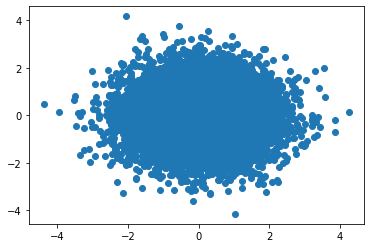

In [39]:
# Box-Muller
from math import sqrt, log, pi, cos, sin

x,y = [], []

for z in range(10001):
    u1, u2 = random.random(), random.random()
    sample1 = sqrt(-2 * log(u1)) * cos(2*pi*u2)
    sample2 = sqrt(-2 * log(u1)) * sin(2*pi*u2)
    x.append(sample1)
    y.append(sample2)

plt.scatter(x,y)
plt.show()

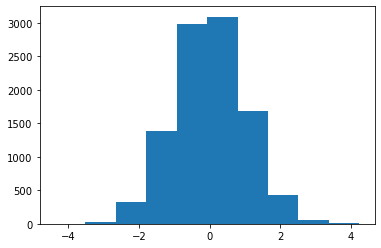

In [40]:
plt.hist(x)
plt.show()

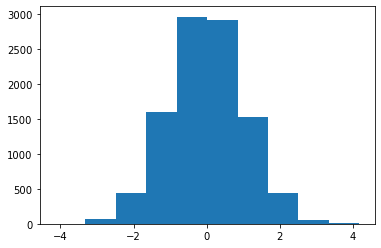

In [41]:
plt.hist(y)
plt.show()

### Financial Modelling - interest-rate simulations with the Vasecik and CIR Models

Examples taken from "Mastering Python for Finance", James Ma Weiming, 2nd Edition, Packt

#### Vasicek Model

$$ dr(T) = K{\theta}-r(t))dt + {\sigma}dW(t) $$

The vasicek() function returns a list of time periods and interest rates from the Vasicek Model where:
* r0 is the initial rate of interest at time t=0
* T is the period in terms of number of years
* N is the number of intervals
* seed is the intialization value for Numpy

There is a possibility of negative interest rates for Vasicek Model.

In [54]:
import math
import numpy as np

def vasicek(r0, K, theta, sigma, T=1.0, N=10, seed=700):
    np.random.seed(seed)
    dt=T/float(N) # dt is the time interval
    rates = [r0] # initial interest rate
    
    for i in range(N):
        # calculate dr, the change in interest rate based on previous interest rate at rates[-1]
        dr = K*(theta-rates[-1]) * dt + sigma * math.sqrt(dt)*np.random.normal()
        rates.append(rates[-1]+dr) 
    
    return range(N+1), rates

Text(0.5, 0, 'Vasicek Model')

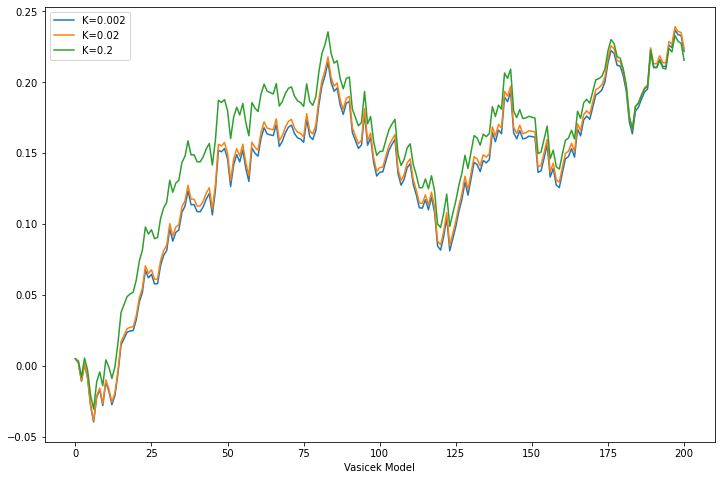

In [55]:
#pylab inline
import matplotlib.pyplot as plot
import pylab

fig = pl.figure(figsize=(12,8))

for K in [0.002, 0.02, 0.2]:
    x,y = vasicek(0.005, K, 0.15, 0.05, T=10, N=200)
    pylab.plot(x,y, label='K=%s'%K)
    pylab.legend(loc='upper left')
    
pylab.legend(loc='upper left')
pylab.xlabel('Vasicek Model')

### Note the negative interest rate!!

####  Cox-Ingersoll-Ross (CIR) Model

$$ dr(T) = K{\theta}-r(t))dt + {\sigma}\sqrt{r(t)}dW(t) $$

CIR model addresses the negative interest rates in the Vasicek Model.

In [51]:
def CIR(r0, K, theta, sigma, T=1.0, N=10, seed=200):
    np.random.seed(seed)
    dt=T/float(N) # dt is the time interval
    rates = [r0] # initial interest rate
    
    for i in range(N):
        # calculate dr, the change in interest rate based on previous interest rate at rates[-1]
        dr = K*(theta-rates[-1]) * dt + sigma * math.sqrt(dt)* math.sqrt(dt)*np.random.normal()
        rates.append(rates[-1]+dr) 
    
    return range(N+1), rates

Text(0.5, 0, 'Vasicek Model')

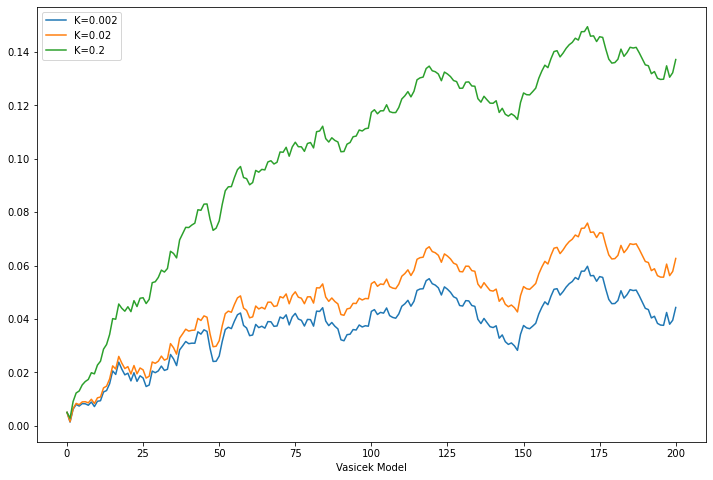

In [53]:
#pylab inline
import matplotlib.pyplot as plot
fig = plt.figure(figsize=(12,8))

for K in [0.002, 0.02, 0.2]:
    x,y = CIR(0.005, K, 0.15, 0.05, T=10, N=200)
    pylab.plot(x,y, label='K=%s'%K)
    pylab.legend(loc='upper left')
    
pylab.legend(loc='upper left')
pylab.xlabel('Vasicek Model')